In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile as zf
import imutils
import cv2
import dlib
import random
import tensorflow as tf

from keras.layers import Dense,Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dropout,Activation
from keras.models import Sequential
from keras.optimizers import SGD,Adam,RMSprop
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.utils import np_utils
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

from imutils import build_montages
from google.colab.patches import cv2_imshow

sns.set()

In [319]:
os.getcwd()

'/content'

In [0]:
handle_santa = zf.ZipFile(r'/content/santa.zip')
handle_santa.extractall('/content/Santa')
handle_santa.close()

handle_not_santa = zf.ZipFile(r'/content/not_santa.zip')
handle_not_santa.extractall('/content/Not_Santa')
handle_not_santa.close()

handle_examples = zf.ZipFile(r'/content/examples.zip')
handle_examples.extractall('/content/Examples')
handle_examples.close()

In [0]:
santa = os.listdir('/content/Santa/santa/')
not_santa = os.listdir('/content/Not_Santa/not_santa/')
exampes = os.listdir('/content/Examples/examples/')

fp_santa = '/content/Santa/santa/'
fp_not_santa = '/content/Not_Santa/not_santa/'
fp_egs = '/content/Examples/examples/'

In [0]:
train = []
test = []
outputs=[]
labels = []

for i in santa:
  image = cv2.imread(fp_santa+i)
  image = cv2.resize(image , (32,32))
  train.append(image)
  labels.append(1) #santa

for i in not_santa:
  image = cv2.imread(fp_not_santa+i)
  image = cv2.resize(image , (32,32))
  train.append(image)
  labels.append(0) #not_santa

for i in exampes:
  image = cv2.imread(fp_egs+i)
  outputs.append(image)
  image = cv2.resize(image , (32,32))
  test.append(image)


In [323]:
train[0].shape

(32, 32, 3)

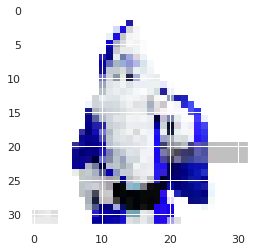

In [324]:
plt.imshow(train[0])

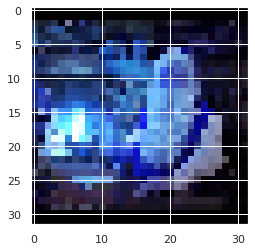

In [325]:
plt.imshow(train[1])

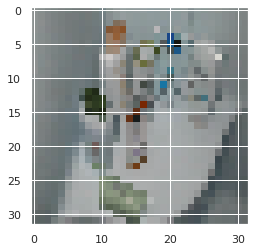

In [326]:
plt.imshow(train[-1])

In [0]:
train = np.array(train , dtype="float") / 255.0
test = np.array(test , dtype="float") / 255.0
labels = np.array(labels)

In [0]:
(trainX , testX , trainY , testY) = train_test_split(train , labels , train_size = 0.8 , test_size = 0.2 , random_state=42)

In [329]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(737, 32, 32, 3)
<class 'numpy.ndarray'>
(737,)
<class 'numpy.ndarray'>
(185, 32, 32, 3)
<class 'numpy.ndarray'>
(185,)


In [0]:
trainY = to_categorical(trainY , num_classes=2)
testY = to_categorical(testY , num_classes=2)

In [331]:
trainY

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

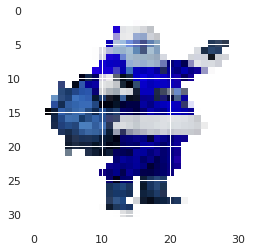

In [332]:
plt.imshow(trainX[0])

In [333]:
model = Sequential()

model.add(Conv2D(filters=6 , kernel_size=(5,5), input_shape=(32,32,3) , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=16 , kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(84, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_31 (Batc (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)             

In [0]:
INIT_LR = 1e-2
EPOCHS = 25
BS = 32

In [0]:
opt = Adam(learning_rate=INIT_LR , decay=INIT_LR / EPOCHS)
#opt=SGD(learning_rate=0.01)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=opt , metrics=["accuracy"])

In [337]:
H = model.fit(trainX,trainY,batch_size=BS,epochs=EPOCHS,validation_data=(testX,testY))

Train on 737 samples, validate on 185 samples
Epoch 1/25
737/737 [==============================] - 2s 2ms/step - loss: 0.4185 - accuracy: 0.8467 - val_loss: 7.1615 - val_accuracy: 0.5297
Epoch 2/25
737/737 [==============================] - 1s 1ms/step - loss: 0.2030 - accuracy: 0.9199 - val_loss: 4.7037 - val_accuracy: 0.5514
Epoch 3/25
737/737 [==============================] - 1s 1ms/step - loss: 0.1978 - accuracy: 0.9267 - val_loss: 2.9051 - val_accuracy: 0.5892
Epoch 4/25
737/737 [==============================] - 1s 1ms/step - loss: 0.2335 - accuracy: 0.8996 - val_loss: 0.6991 - val_accuracy: 0.7622
Epoch 5/25
737/737 [==============================] - 1s 1ms/step - loss: 0.1842 - accuracy: 0.9213 - val_loss: 0.4424 - val_accuracy: 0.8432
Epoch 6/25
737/737 [==============================] - 1s 1ms/step - loss: 0.1254 - accuracy: 0.9498 - val_loss: 0.6225 - val_accuracy: 0.7784
Epoch 7/25
737/737 [==============================] - 1s 1ms/step - loss: 0.1337 - accuracy: 0.9566 - 

In [338]:
predictions = model.predict(testX)
predictions

array([[6.34769559e-01, 3.65230441e-01],
       [1.43159079e-04, 9.99856830e-01],
       [9.99413848e-01, 5.86204464e-04],
       [3.51113376e-05, 9.99964833e-01],
       [9.91782784e-01, 8.21726024e-03],
       [5.03895390e-05, 9.99949574e-01],
       [6.24870300e-01, 3.75129730e-01],
       [9.79612947e-01, 2.03869808e-02],
       [9.93633389e-01, 6.36656489e-03],
       [3.61939271e-07, 9.99999642e-01],
       [1.19162212e-06, 9.99998808e-01],
       [1.11236125e-01, 8.88763905e-01],
       [7.80848324e-01, 2.19151750e-01],
       [9.99419212e-01, 5.80856926e-04],
       [9.99999762e-01, 1.95136593e-07],
       [5.06365031e-04, 9.99493599e-01],
       [3.02807690e-04, 9.99697208e-01],
       [3.04701302e-04, 9.99695301e-01],
       [3.75879208e-05, 9.99962449e-01],
       [9.99996305e-01, 3.67154098e-06],
       [2.82723922e-05, 9.99971747e-01],
       [3.77806457e-04, 9.99622226e-01],
       [3.84422718e-03, 9.96155798e-01],
       [5.97372891e-05, 9.99940276e-01],
       [6.121298

In [339]:
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=["not_santa","santa"]))

              precision    recall  f1-score   support

   not_santa       0.96      0.92      0.94        87
       santa       0.93      0.97      0.95        98

    accuracy                           0.95       185
   macro avg       0.95      0.94      0.95       185
weighted avg       0.95      0.95      0.95       185



In [340]:
cnf = confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
print(cnf)

[[80  7]
 [ 3 95]]


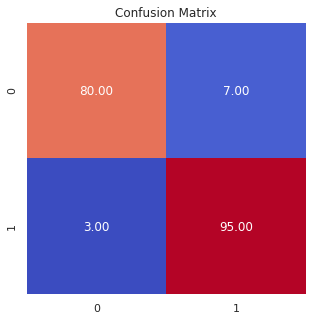

In [341]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf, cmap="coolwarm", cbar=False , annot=True , fmt='.2f')
plt.title("Confusion Matrix")
plt.show()

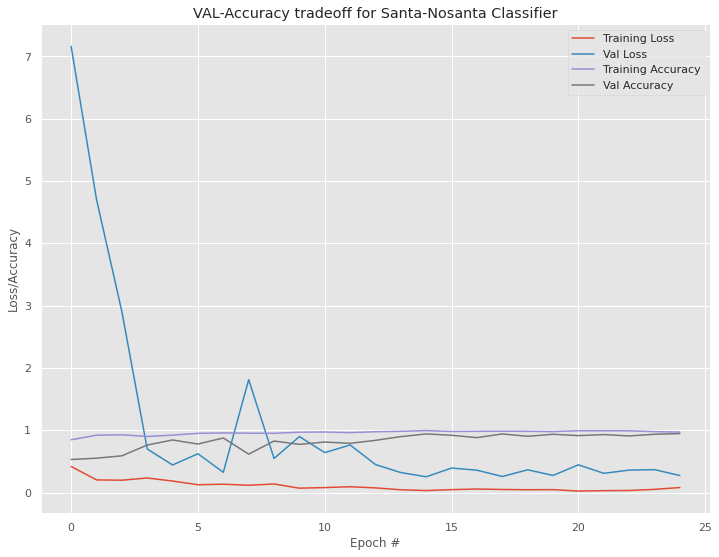

In [342]:
N = np.arange(0 , EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(12,9))
plt.plot(N , H.history['loss'], label="Training Loss")
plt.plot(N , H.history['val_loss'], label="Val Loss")
plt.plot(N , H.history['accuracy'], label="Training Accuracy")
plt.plot(N , H.history['val_accuracy'], label="Val Accuracy")
plt.title("VAL-Accuracy tradeoff for Santa-Nosanta Classifier")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [343]:
preds = model.predict(test)
preds

array([[5.0706422e-04, 9.9949288e-01],
       [3.5541134e-03, 9.9644595e-01],
       [9.9999988e-01, 1.6201696e-07],
       [9.9700373e-01, 2.9962240e-03]], dtype=float32)

In [344]:
index = preds.argmax(axis=1)
index

array([1, 1, 0, 0])

In [345]:
vals = np.amax(preds, axis=1)
vals

array([0.9994929 , 0.99644595, 0.9999999 , 0.99700373], dtype=float32)

In [346]:
vals = vals*100
vals = vals.round(2)
vals

array([ 99.95,  99.64, 100.  ,  99.7 ], dtype=float32)

In [0]:
labels = []

for i in index:
  if i == 0:
    labels.append('Not_Santa')
  else:
    labels.append('Santa')


In [348]:
labels

['Santa', 'Santa', 'Not_Santa', 'Not_Santa']

In [0]:
results = []

for i in range(4):
  text = labels[i] + ": " + str(vals[i])

  outputs[i] = cv2.resize(outputs[i] , (300,300))

  cv2.putText(outputs[i],text,(10,40),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),3)

  results.append(outputs[i]) 



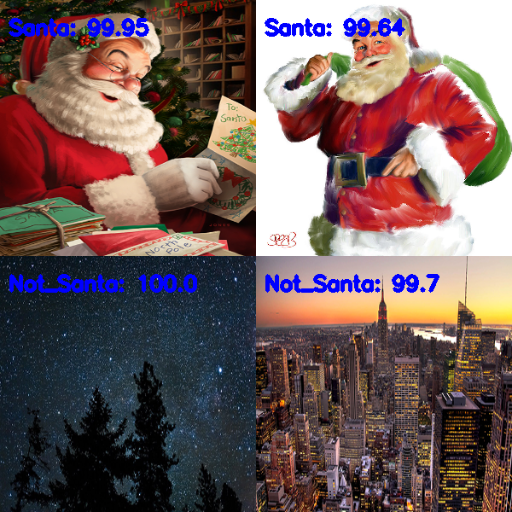

-1

In [350]:
montage = build_montages(results , (256,256), (2,2) )[0]

cv2_imshow(montage)
cv2.waitKey(0)